## **Environment Setup**

In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.0.3'

## **Importing Libraries**

In [2]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import patches

from glob import glob

import xml.etree.ElementTree as ET

## **Generate Train.csv**

In [7]:
annotations = glob('annots/*.xml')

df = []
cnt = 0

for file in annotations:

    filename = file.split('/')[-1]
    filename = filename.split('.')[0] + '.jpg'
    row = []
    parsedXML = ET.parse(file)

    for node in parsedXML.getroot().iter('object'):

        kangaroo = node.find('name').text
        
        xmin = int(node.find('bndbox/xmin').text)
        xmax = int(node.find('bndbox/xmax').text)
        ymin = int(node.find('bndbox/ymin').text)
        ymax = int(node.find('bndbox/ymax').text)

        row = [filename, kangaroo, xmin, xmax, ymin, ymax]
        df.append(row)
        cnt += 1

data = pd.DataFrame(df, columns=['filename', 'class', 'xmin', 'xmax', 'ymin', 'ymax'])
data[['filename', 'class', 'xmin', 'xmax', 'ymin', 'ymax']].to_csv('train.csv', index=False)
data.head()

filename     class  xmin  xmax  ymin  ymax
0  00081.jpg  kangaroo   353   515    95   337
1  00122.jpg  kangaroo    73   311    54   227
2  00122.jpg  kangaroo   182   445    89   202
3  00164.jpg  kangaroo    75   397    45   449
4  00164.jpg  kangaroo     6   110   269   440

## **Load CSV**

In [8]:
train = pd.read_csv('train.csv')
train.head()

filename     class  xmin  xmax  ymin  ymax
0  00081.jpg  kangaroo   353   515    95   337
1  00122.jpg  kangaroo    73   311    54   227
2  00122.jpg  kangaroo   182   445    89   202
3  00164.jpg  kangaroo    75   397    45   449
4  00164.jpg  kangaroo     6   110   269   440

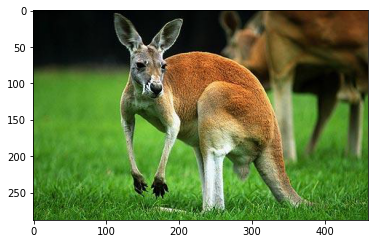

In [9]:
image = plt.imread('images/00003.jpg')
plt.imshow(image)

In [10]:
train['filename'].nunique()

164

In [12]:
train['class'].value_counts()

kangaroo    266
Name: class, dtype: int64

## **Implementing Faster RCNN**

In [13]:
# Creating Text File for Training Model

data = pd.DataFrame()
data['format'] = train['filename']

# as the images are in train_images folder, add train_images before the image name
for i in range(data.shape[0]):
    data['format'][i] = 'images/' + data['format'][i]

# add xmin, ymin, xmax, ymax and class as per the format required
for i in range(data.shape[0]):
    data['format'][i] = data['format'][i] + ',' + str(train['xmin'][i]) + ',' + str(train['ymin'][i]) + ',' + str(train['xmax'][i]) + ',' + str(train['ymax'][i]) + ',' + train['class'][i]

data.to_csv('annotate.txt', header=None, index=None, sep=' ')

In [14]:
# Train the Model

! python keras-frcnn/train_frcnn.py -o simple -p annotate.txt

Using TensorFlow backend.
Parsing annotation files
Premature end of JPEG file
Parsing annotation files
Premature end of JPEG file
Training images per class:
{'bg': 0, 'kangaroo': 266}
Num classes (including bg) = 2
Config has been written to config.pickle, and can be loaded when testing to ensure correct results
Num train samples 164
Num val samples 164






Instructions for updating:
keep_dims is deprecated, use keepdims instead
loading weights from {C.base_net_weights}
Could not load pretrained model weights. Weights can be found in the keras application folder 		https://github.com/fchollet/keras/tree/master/keras/applications


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Starting training
Epoch 1/20

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor




2021-10-12 18:09:29.819934: I tensorflow/

## **Evaluate the Trained Model**

In [16]:
! python keras-frcnn/test_frcnn.py -p images

Using TensorFlow backend.


2021-10-12 18:57:29.663651: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2021-10-12 18:57:29.685495: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2096815000 Hz
2021-10-12 18:57:29.686030: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55d6b3e26e30 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2021-10-12 18:57:29.686065: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2021-10-12 18:57:29.688395: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-10-12 18:57:29.861497: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [17]:
results = pd.read_csv('result.csv')
results

Empty DataFrame
Columns: [Unnamed: 0, image, xmin, ymin, xmax, ymax, label]
Index: []